In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## The ward Data

In [2]:
ward = pd.read_pickle('./dataset/ward.p')
print(ward.shape)
ward.head()

(50, 4)


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


## The census Data

In [3]:
census = pd.read_pickle('./dataset/census.p')
print(census.shape)
census.head()

(50, 6)


,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


## Inner join

For clarity
- Tables == DataFrame
- merging == joining

<img src="./media/inner join.png">

In [4]:
ward_census = ward.merge(census, on='ward')
print(ward_census.shape)
ward_census.head()
#by default meger add suffixes of _x and _y on left and right data repectively

(50, 9)


,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [5]:
# to give custmoize suffix
ward_census = ward.merge(census, on='ward', suffixes=('_ward', '_cen'))
print(ward_census.shape)
ward_census.head()

(50, 9)


,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


## Relationships : Types of relationships
- one to one
- one to many
- many to one 
- many to many

### one to one 
- Every row in left table is related to one or more rows in right table.

In [6]:
licenses = pd.read_pickle('./dataset/licenses.p')
print(licenses.shape)
licenses.head()

(10000, 6)


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [7]:
ward_licenses = ward.merge(licenses, on='ward', suffixes=('_ward', '_linc'))
print(ward_licenses.shape)
ward_licenses.head()

(10000, 9)


,ward,alderman,address_ward,zip_ward,account,aid,business,address_linc,zip_linc
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [8]:
#Note
print(ward.shape)
print(ward_licenses.shape)

(50, 4)
(10000, 9)


## Merging multiple DataFrames

<img src= './media/multiple_dataframe.png'>

In [9]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [10]:
ward.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [11]:
# new dataset
grants = pd.read_pickle('./dataset/zip_demo.p')
print(grants.shape)
grants.head()

(66, 2)


,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [12]:
grants['address'] = 'REGGIE\'S BAR & GRILL'

In [13]:
grants

,zip,income,address
0,60630,70122,REGGIE'S BAR & GRILL
1,60640,50488,REGGIE'S BAR & GRILL
2,60622,87143,REGGIE'S BAR & GRILL
3,60614,100116,REGGIE'S BAR & GRILL
4,60608,41226,REGGIE'S BAR & GRILL
...,...,...,...
61,53045,100438,REGGIE'S BAR & GRILL
62,60076,74964,REGGIE'S BAR & GRILL
63,60126,103454,REGGIE'S BAR & GRILL
64,60458,47411,REGGIE'S BAR & GRILL


In [14]:
grants_licenses= grants.merge(licenses, on='zip')

# print(grants_licenses.loc[grants_licenses['business']=="REGGIE'S BAR & GRILL",
#                           ['grant','company','account','ward','business']])

## Single merge

In [15]:
ward.merge(licenses, on=['ward', 'zip']).head()

,ward,alderman,address_x,zip,account,aid,business,address_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16004,NaN,EL NUEVO NARANJO LOUNGE,2210 N MILWAUKEE AVE 1ST
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16547,763,PETE'S FOOD & LIQUOR,2556 W ARMITAGE AVE 1ST
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16662,763,BUCK TOWN FOOD & LIQUORS,1950 N MILWAUKEE AVE
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16899,775,JACK'S PLACE,2917 W ARMITAGE AVE GROUN


## multiple merge

In [16]:
ward.merge(licenses, on=['ward', 'zip'], suffixes=('_ward', '_linc')).head()

,ward,alderman,address_ward,zip,account,aid,business,address_linc
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16004,NaN,EL NUEVO NARANJO LOUNGE,2210 N MILWAUKEE AVE 1ST
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16547,763,PETE'S FOOD & LIQUOR,2556 W ARMITAGE AVE 1ST
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16662,763,BUCK TOWN FOOD & LIQUORS,1950 N MILWAUKEE AVE
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16899,775,JACK'S PLACE,2917 W ARMITAGE AVE GROUN


In [17]:
grant_licenses_ward = ward.merge(licenses, on=['ward', 'zip'],suffixes=('_ward', '_linc'))\
                        .merge(grants, on='zip')
grant_licenses_ward.head()

,ward,alderman,address_ward,zip,account,aid,business,address_linc,income,address
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,68223,REGGIE'S BAR & GRILL
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16004,NaN,EL NUEVO NARANJO LOUNGE,2210 N MILWAUKEE AVE 1ST,68223,REGGIE'S BAR & GRILL
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16547,763,PETE'S FOOD & LIQUOR,2556 W ARMITAGE AVE 1ST,68223,REGGIE'S BAR & GRILL
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16662,763,BUCK TOWN FOOD & LIQUORS,1950 N MILWAUKEE AVE,68223,REGGIE'S BAR & GRILL
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,16899,775,JACK'S PLACE,2917 W ARMITAGE AVE GROUN,68223,REGGIE'S BAR & GRILL


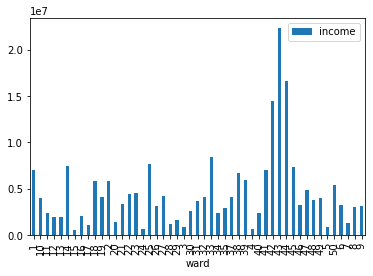

In [18]:
grant_licenses_ward.groupby('ward').agg('sum').plot(kind='bar', y='income')
plt.show()

## for merging more tables

<img src='./media/moretables.png'>

## Practise

In [3]:
taxi_owners = pd.read_pickle('./dataset/practise_dataset/taxi_owners.p')
print(taxi_owners.shape)
taxi_owners.head()

(3519, 5)


,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [4]:
tax_veh = pd.read_pickle('./dataset/practise_dataset//taxi_vehicles.p')
print(tax_veh.shape)
tax_veh.head()

(3519, 6)


,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


### 1.
Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh

In [5]:
taxi_own_veh = taxi_owners.merge(tax_veh, on='vid') #<-- inner merge
print(taxi_own_veh.shape)
taxi_own_veh.head()

(3519, 10)


,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


### 2.
Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.

In [6]:
#added suffixes
taxi_own_veh = taxi_owners.merge(tax_veh, on='vid', suffixes=('_own', '_veh'))
print(taxi_own_veh.shape)
taxi_own_veh.head()

(3519, 10)


,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


### 3.
Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.

In [7]:
taxi_own_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

### 3.
Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.

In [9]:
biz_ownwers = pd.read_pickle('./dataset/practise_dataset/business_owners.p')
print(biz_ownwers.shape)
biz_ownwers.head()

(21352, 4)


,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [11]:
# licenses_owners = pd.read_csv('./dataset/licenses.p')
licenses_owners = licenses.merge(biz_ownwers, on='account')
print(licenses_owners.shape)
licenses_owners.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 19, saw 2


### 4.
Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df

In [26]:
# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account': 'count'})
counted_df

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


### 5.
- Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.

- Use the .head() method to print the first few rows of the sorted_df.

In [27]:
# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account', ascending=False)
sorted_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


## Case study : Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7).Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is below.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

<img src= './media/case_study.png'>

- Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect
- Extend the previous merge to three tables by also merging the stations table.
- Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.

In [14]:
ridership = pd.read_pickle('./dataset/practise_datase/cta_ridership.p')
cal = pd.read_pickle('./dataset/practise_dataset/cta_calendar.p')
stations = pd.read_pickle('./dataset/practise_dataset/cta_stations.p')

FileNotFoundError: [Errno 2] No such file or directory: './dataset/practise_datase/cta_ridership.p'

In [29]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year','month','day'])

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                            .merge(stations, on='station_id')

In [30]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                                .merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

The licenses, wards, and zip_demo DataFrames have been loaded for you.
- Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
- Group the results of the three merged tables by the column alderman and find the median income.

In [33]:
zip_demo = pd.read_pickle('./dataset/zip_demo.p')
print(zip_demo.shape)
zip_demo.head()

(66, 2)


,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [37]:
licenses_zip_ward = licenses.merge(zip_demo, on='zip')\
                    .merge(ward, on='ward')
print(licenses_zip_ward.shape)
licenses_zip_ward.head()

(9994, 10)


,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
2,15015,3,NaN,"SOUTHVIEW MANOR, INC.",3311 S MICHIGAN AVE,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
3,19168,3,666,BP AMOCO,3101 S MICHIGAN AVE 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
4,205980,3,763,J & J FISH & CHICKEN,8 E CERMAK RD,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609


In [40]:
licenses_zip_ward.groupby('alderman').agg('median').head()

,income
alderman,
Ameya Pawar,66246
Anthony A. Beale,38206
Anthony V. Napolitano,82226
Ariel E. Reyboras,41307
Brendan Reilly,110215


In [46]:
licenses_zip_ward.groupby('alderman').agg({'income':'median'}).sort_values(by='alderman', ascending=False).head()

,income
alderman,
Willie B. Cochran,28024
William D. Burns,107811
"Walter Burnett, Jr.",87143
Toni L. Foulkes,27573
Tom Tunney,88708


In [47]:
licenses_zip_ward.groupby('alderman').agg({'income':'median'}).shape

(50, 1)

- Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic
- Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.
- Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

In [54]:
land_use = pd.read_pickle('./dataset/land_use.p')
print(land_use.shape)
# land_use.head()

(50, 6)


In [58]:
land_cen_lic = land_use.merge(census, on='ward')\
                   .merge(licenses, on='ward', suffixes=('_cen', '_lic'))
print(land_cen_lic.shape)
# land_cen_lic.head()

(10000, 16)


In [60]:
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant']).agg({'account':'count'})

print(pop_vac_lic.shape)
pop_vac_lic.head()

(50, 1)


,,,account
ward,pop_2010,vacant,
1,56149,2,253
10,51535,14,130
11,51497,5,201
12,52235,4,255
13,53722,1,101


In [61]:
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[False,True,True])
sorted_pop_vac_lic.head()

,,,account
ward,pop_2010,vacant,
7,51581,19,80
20,52372,15,123
10,51535,14,130
24,54909,13,98
16,51954,13,156
